In [1]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# matrix kubus dengan penulisan (x, y, z)
# plot titik-titik dari kubus
cube_matrix = np.array([
    [1, 1, 1],
    [3, 1, 1],
    [3, 3, 1],
    [1, 3, 1],

    [1, 1, 3],
    [3, 1, 3],
    [3, 3, 3],
    [1, 3, 3]
])

In [3]:
cube_matrix

array([[1, 1, 1],
       [3, 1, 1],
       [3, 3, 1],
       [1, 3, 1],
       [1, 1, 3],
       [3, 1, 3],
       [3, 3, 3],
       [1, 3, 3]])

In [4]:
def plotCube_beforeRotation(cube_definition):
#     menetukan garis-garis setiap sisi
    edges = [
        [cube_definition[0], cube_definition[1], cube_definition[2], cube_definition[3]],
        [cube_definition[4], cube_definition[5], cube_definition[6], cube_definition[7]],
        [cube_definition[0], cube_definition[1], cube_definition[5], cube_definition[4]],
        [cube_definition[2], cube_definition[3], cube_definition[7], cube_definition[6]],
        [cube_definition[1], cube_definition[2], cube_definition[6], cube_definition[5]],
        [cube_definition[0], cube_definition[3], cube_definition[7], cube_definition[4]]
    ]
    
#     print(np.array(edges))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    
    for row in cube_definition:
        x, y, z = row
#         memplot titik-titik kubus
        ax.scatter(x, y, z, c='b')

#     untuk memplot 3D bagian sisi
    faces = Poly3DCollection(edges, linewidths=1, edgecolors='k')
    faces.set_facecolor((0,0,1,0.1))

    ax.add_collection3d(faces)

    plt.gca().set_xticks(np.arange(-3, 6, 1))
    plt.gca().set_yticks(np.arange(-3, 6, 1))
    plt.gca().set_zticks(np.arange(-3, 6, 1))
    
    ax.set_xlabel('x axis')
    ax.set_ylabel('y axis')
    ax.set_zlabel('z axis')
    
    plt.title("Kubus sebelum rotasi")
    plt.grid()
    plt.show()

<IPython.core.display.Javascript object>


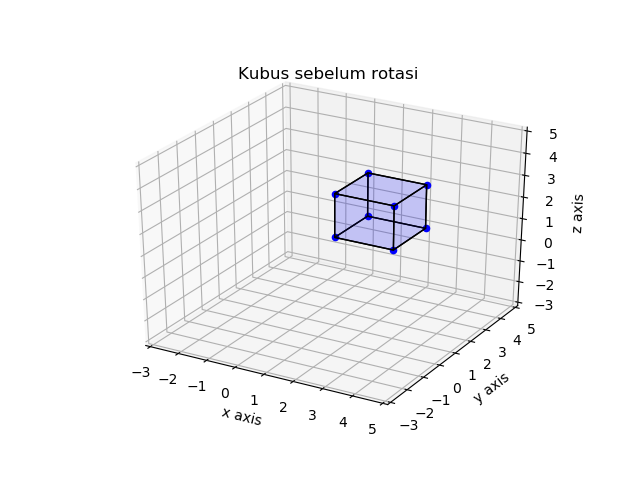

In [5]:
plotCube_beforeRotation(cube_matrix)

In [6]:
def threeDimensionRotation_axis(matrix, n_topi, degree):
    '''
        matrix = matrix 3D yang akan dirotasi
        n_topi = nilai bebas untuk di pecah ke dalam (n^x,n^y,n^z)
        degree = besar derajat untuk perputaran
    '''
#     memecah n_topi
    nx, ny, nz = n_topi
    ntopi_x = np.array([
        [0, -nz, ny],
        [nz, 0, -nx],
        [-ny, nx, 0]
    ])
    
#     inisiasi matrix identitas
    I = np.eye(3)
    
#     hitung nilai sin(theta) dan cos(theta)
    calc_sin = np.sin(degree * np.pi/180)
    calc_cos = np.cos(degree * np.pi/180)
    
#     rumus rodriguez
    rodri_mat = I + (calc_sin * ntopi_x) + ((1 - calc_cos) * (ntopi_x @ ntopi_x))
    
#     mengalikan hasil dari rumus rodriguez ke matrix input yang di transpose (agar format matrix menjadi[[x1,x2,...], [y1,y2,...], [z1,z2,...]])
    result = rodri_mat @ matrix.transpose()
    
#     me-transpose hasil perkalian matrix ke bentuk semula
    result = result.transpose()
    
    return result

def threeDimensionRotation_quartenion(matrix, n_topi, degree):
    '''
        matrix = matrix 3D yang akan dirotasi
        n_topi = nilai bebas untuk di pecah ke dalam (n^x,n^y,n^z)
        degree = besar derajat untuk perputaran
    '''
    #     inisiasi matrix identitas
    I = np.eye(3)
    
    theta = ((degree * np.pi) / 180)
#     nilai v
    v = np.sin(theta/2) * n_topi
#     memecah nilai v ke dalam x, y ,z
    v_x, v_y, v_z = v
    
    w = np.cos(theta/2)
    
    v_matrix = np.array([
        [0, -v_z, v_y],
        [v_z, 0, -v_x],
        [-v_y, v_x, 0]
    ])
    
    q = I + (2 * w * v_matrix) + (2 * (v_matrix @ v_matrix))

    result = q @ matrix.transpose()
    
    result = result.transpose()
    
    return result
    

In [7]:
# magnitude n_topi < 1
n_topi1 =  np.array([0.1, 0.3, 0.9])
print(np.linalg.norm(n_topi1))

0.9539392014169457


In [8]:
# magnitude n_topi > 1
n_topi2 =  np.array([3, 6, 2])
print(np.linalg.norm(n_topi2))

7.0


In [9]:
# magnitude n_topi = 1
n_topi3 = np.array([1, 0, 0])

# agar n_topi menghasilkan magnitude = 1, dengan berapapun nilai elemennya
mgn = np.linalg.norm(n_topi3)
n_topi3 = (1 / mgn) * n_topi3
print(np.linalg.norm(n_topi3))

1.0


# Rotasi 3D Axis

### Percobaan 1: n^ dengan magnitude < 1

In [10]:
axis_1 = threeDimensionRotation_axis(cube_matrix, n_topi1, 45)
axis_1

array([[ 0.34727922,  1.41338095,  0.93473088],
       [ 1.82007143,  2.70374675,  0.56318759],
       [ 0.56485281,  4.22340187,  0.86277129],
       [-0.90793939,  2.93303607,  1.23431458],
       [ 0.82426407,  1.43012193,  2.87615224],
       [ 2.29705627,  2.72048773,  2.50460895],
       [ 1.04183766,  4.24014285,  2.80419264],
       [-0.43095454,  2.94977705,  3.17573593]])

<IPython.core.display.Javascript object>


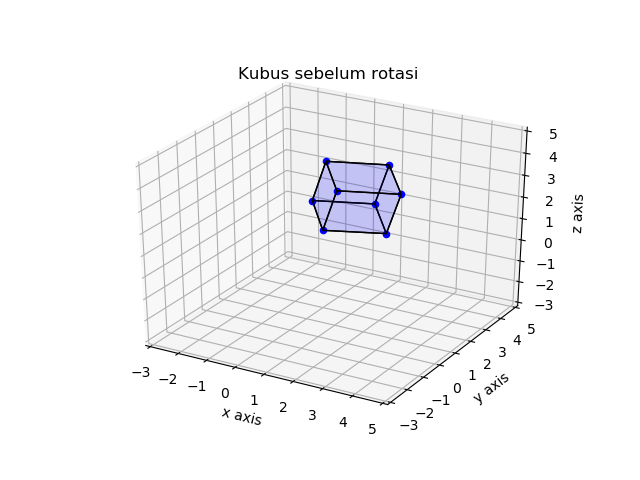

In [11]:
plotCube_beforeRotation(axis_1)

### Percobaan 1: n^ dengan magnitude > 1

In [12]:
axis_2 = threeDimensionRotation_axis(cube_matrix, n_topi2, 45)
axis_2

array([[ -0.85786438,   5.27207794,  -9.02943725],
       [-22.28932188,  18.64466094, -14.        ],
       [-14.57359313,  13.02943725,  -2.72792206],
       [  6.85786438,  -0.34314575,   2.24264069],
       [ 11.14213562,   8.0588745 , -33.38982694],
       [-10.28932188,  21.43145751, -38.36038969],
       [ -2.57359313,  15.81623382, -27.08831175],
       [ 18.85786438,   2.44365081, -22.11774901]])

<IPython.core.display.Javascript object>


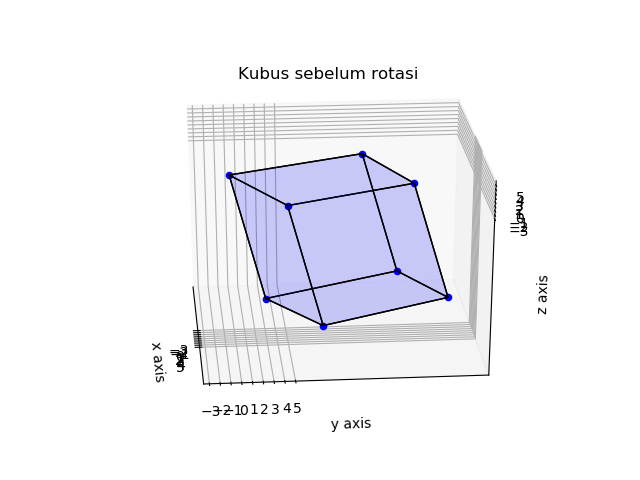

In [13]:
plotCube_beforeRotation(axis_2)

### Percobaan 1: n^ dengan magnitude = 1

In [14]:
axis_3 = threeDimensionRotation_axis(cube_matrix, n_topi3, 45)
axis_3

array([[ 1.00000000e+00,  0.00000000e+00,  1.41421356e+00],
       [ 3.00000000e+00,  0.00000000e+00,  1.41421356e+00],
       [ 3.00000000e+00,  1.41421356e+00,  2.82842712e+00],
       [ 1.00000000e+00,  1.41421356e+00,  2.82842712e+00],
       [ 1.00000000e+00, -1.41421356e+00,  2.82842712e+00],
       [ 3.00000000e+00, -1.41421356e+00,  2.82842712e+00],
       [ 3.00000000e+00,  1.11022302e-16,  4.24264069e+00],
       [ 1.00000000e+00,  1.11022302e-16,  4.24264069e+00]])

<IPython.core.display.Javascript object>


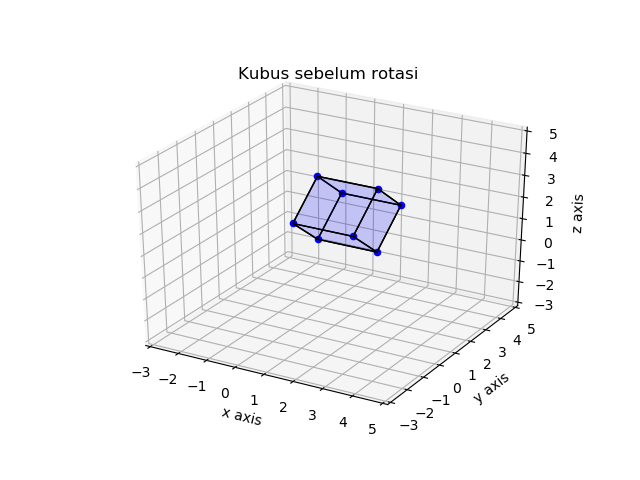

In [15]:
plotCube_beforeRotation(axis_3)

## Kesimpulan Rotasi 3D axis

dengan menggunakan n^ yang memiliki magnitude < 1 maka objek akan berotasi sedikit. Jika magnitude dari n^ = 1 maka rotasi akan sempurna, dan jika magnitude n^ > 1 maka objek akan semakin besar dan pipih 

# Unit Quartenion

### Percobaan 1: n^ dengan magnitude < 1

In [16]:
uq_1 = threeDimensionRotation_quartenion(cube_matrix, n_topi1, 45)
uq_1

array([[ 0.34727922,  1.41338095,  0.93473088],
       [ 1.82007143,  2.70374675,  0.56318759],
       [ 0.56485281,  4.22340187,  0.86277129],
       [-0.90793939,  2.93303607,  1.23431458],
       [ 0.82426407,  1.43012193,  2.87615224],
       [ 2.29705627,  2.72048773,  2.50460895],
       [ 1.04183766,  4.24014285,  2.80419264],
       [-0.43095454,  2.94977705,  3.17573593]])

<IPython.core.display.Javascript object>


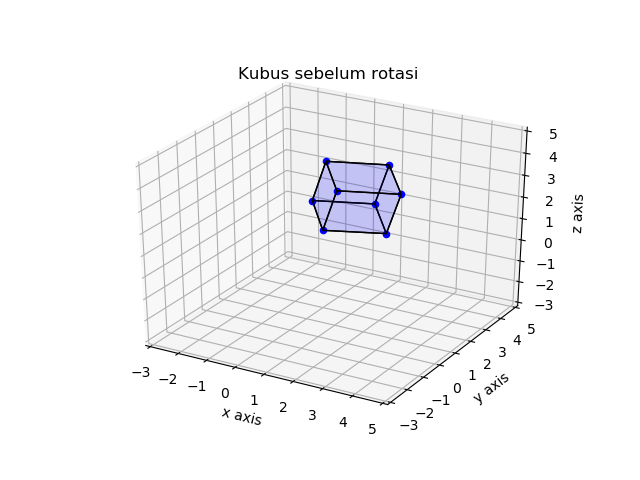

In [17]:
plotCube_beforeRotation(uq_1)

### Percobaan 1: n^ dengan magnitude > 1

In [18]:
uq_2 = threeDimensionRotation_quartenion(cube_matrix, n_topi2, 45)
uq_2

array([[ -0.85786438,   5.27207794,  -9.02943725],
       [-22.28932188,  18.64466094, -14.        ],
       [-14.57359313,  13.02943725,  -2.72792206],
       [  6.85786438,  -0.34314575,   2.24264069],
       [ 11.14213562,   8.0588745 , -33.38982694],
       [-10.28932188,  21.43145751, -38.36038969],
       [ -2.57359313,  15.81623382, -27.08831175],
       [ 18.85786438,   2.44365081, -22.11774901]])

<IPython.core.display.Javascript object>


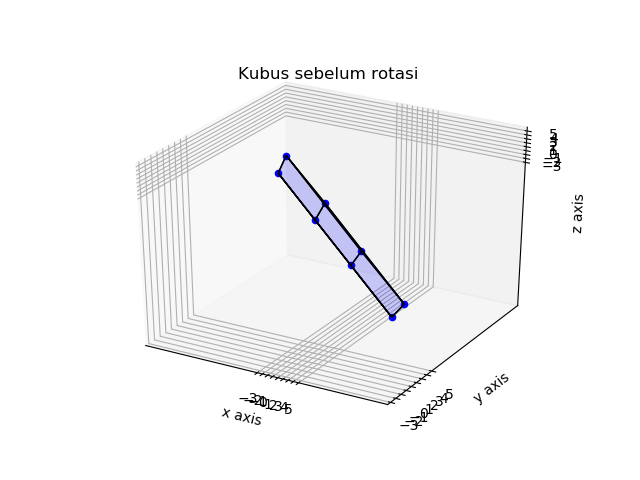

In [20]:
plotCube_beforeRotation(uq_2)

### Percobaan 1: n^ dengan magnitude = 1

In [21]:
uq_3 = threeDimensionRotation_quartenion(cube_matrix, n_topi3, 45)
uq_3

array([[ 1.00000000e+00, -1.11022302e-16,  1.41421356e+00],
       [ 3.00000000e+00, -1.11022302e-16,  1.41421356e+00],
       [ 3.00000000e+00,  1.41421356e+00,  2.82842712e+00],
       [ 1.00000000e+00,  1.41421356e+00,  2.82842712e+00],
       [ 1.00000000e+00, -1.41421356e+00,  2.82842712e+00],
       [ 3.00000000e+00, -1.41421356e+00,  2.82842712e+00],
       [ 3.00000000e+00, -3.33066907e-16,  4.24264069e+00],
       [ 1.00000000e+00, -3.33066907e-16,  4.24264069e+00]])

<IPython.core.display.Javascript object>


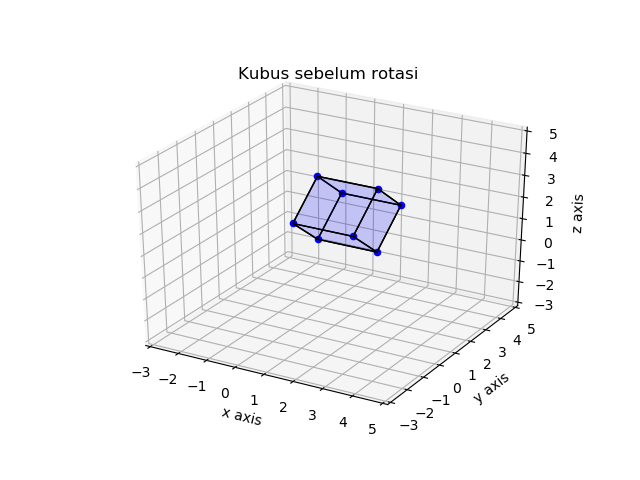

In [22]:
plotCube_beforeRotation(uq_3)

## Kesimpulan 3D Rotasi unit quartenion

Dari experimen menggunakna unit quartenion saya menguji dengan n^ yang sama dengan n^ yang digunakan saat ekperimen pada rotasi 3D axis dan hasil yang saya dapatkan sama ekperimen pada rotasi axis yaitu menggunakan n^ yang memiliki magnitude < 1 maka objek akan berotasi sedikit. Jika magnitude dari n^ = 1 maka rotasi akan sempurna, dan jika magnitude n^ > 1 maka objek akan semakin besar dan pipih